# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

student_data.dtypes


Age        int64
Tardies    int64
dtype: object

Draw a dispersion diagram (scatter plot) for the data.

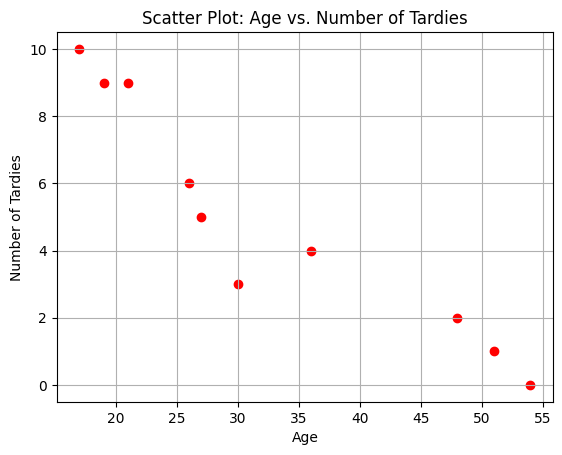

In [4]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], color='red')
plt.title('Scatter Plot: Age vs. Number of Tardies')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.grid(True)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Task 2: Calculate covariance and correlation
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f"Covariance between Age and Tardies: {covariance:.4f}")

correlation = student_data['Age'].corr(student_data['Tardies'])
print(f"Correlation between Age and Tardies: {correlation:.4f}")

Covariance between Age and Tardies: -45.5667
Correlation between Age and Tardies: -0.9392


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Prepare the data for regression
X = student_data[['Age']]  # Independent variable needs to be in a 2D array format for sklearn
y = student_data['Tardies']  # Dependent variable

# Step 3: Create and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Step 4: Get the model's parameters
slope = regression_model.coef_[0]  # Slope of the regression line
intercept = regression_model.intercept_  # Intercept of the regression line

# Step 5: Display the model parameters
print(f"Linear Regression Model: Tardies = {slope:.4f} * Age + {intercept:.4f}")

# Step 6: Predict the values using the regression model
y_pred = regression_model.predict(X)



Linear Regression Model: Tardies = -0.2428 * Age + 12.8888


Plot your regression model on your scatter plot.

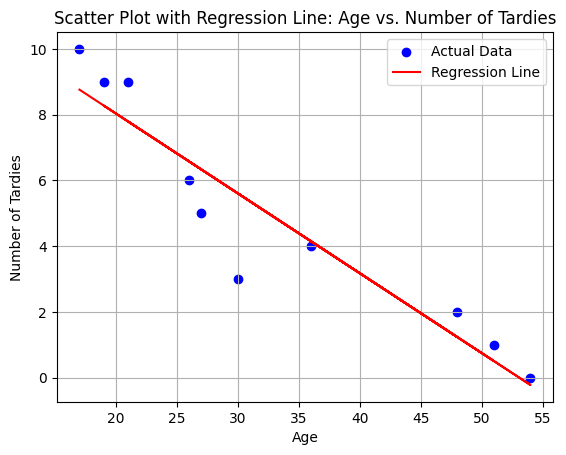

In [8]:
# Your code here.

# Step 7: Plot the scatter plot and regression line
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', label='Actual Data')
plt.plot(student_data['Age'], y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Number of Tardies')
plt.title('Scatter Plot with Regression Line: Age vs. Number of Tardies')
plt.legend()
plt.grid(True)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Calculate correlations between variables and CO2 Emission Grams/Mile
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
correlations = vehicles[variables + ['CO2 Emission Grams/Mile']].corr()['CO2 Emission Grams/Mile']

# Display correlations
print(correlations)


Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:

# Define the independent and dependent variables
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Create the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Display the model's coefficients and intercept
coefficients = regression_model.coef_
intercept = regression_model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercept: 769.8882836465655


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
import statsmodels.api as sm

# Add a constant to the independent variables
X_with_constant = sm.add_constant(X)

# Create the OLS (Ordinary Least Squares) regression model and fit it
ols_model = sm.OLS(y, X_with_constant).fit()

# Print the regression summary
print(ols_model.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                             14:58:46   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*